<h1 style="text-align:center;">K-Means</h1>

- **Nasıl Çalışır?**
    - Kaç küme olacağı kullanıcıdan parametre olarak seçilir.
    - Rastgele olarak *k* merkez noktası seçilir.
    - Her veri örneği en yakın merkez noktasına göre ilgili kümeye atanır.
    - Her küme için yeni merkez noktaları hesaplanarak merkez noktaları kaydırılır.
    - Yeni merkez noktasıyla işlem tekrarlanır.


**Steps 1-2:**

<div style="text-align: center;">
  <img src="km1.png" width="500">
  <img src="km2.png" width="500">
</div>


**Steps 3-4:**
<div style="text-align: center;">
  <img src="km3.png" width="500">
  <img src="km4.png" width="500">
</div>


**Steps 5-6:**
<div style="text-align: center;">
  <img src="km5.png" width="500">
  <img src="km6.png" width="500">
</div>


**Steps 7-8:**
<div style="text-align: center;">
  <img src="km7.png" width="500">
  <img src="km8.png" width="500">
</div>


**Steps 9-10:**
<div style="text-align: center;">
  <img src="km9.png" width="500">
  <img src="km10.png" width="500">
</div>


**Steps 11-12:**
<div style="text-align: center;">
  <img src="km11.png" width="500">
  <img src="km12.png" width="500">
</div>


## Random Initialization Trap in K-Means:

Randomly chosen initial points may lead to wrong clustering.

**What we would like to see:**
<div style="text-align: center;">
  <img src="kmt1.png" width="500">
  <img src="kmt2.png" width="500">
</div>


**Randomly chosen points:**
<div style="text-align: center;">
  <img src="kmt3.png" width="500">
  <img src="kmt4.png" width="500">
</div>

## K-Means++:
1. Rastgele seçilen noktalardan en yakınına her noktadan uzaklığı hesapla (bunda $D(x)$ diyelim.).
2. Yeni noktaları mesafenin karesini olasılık alarak $(D(x)^2$ ile$)$ bul.

## Within-Cluster Sums of Squares (WCSS):
It is used to measure the success of clustering.


$$\text{WCSS} = \sum_{P_i \text{ in Cluster 1}} \text{distance}(P_i,C_1)^2 + \sum_{P_i \text{ in Cluster 2}} \text{distance}(P_i,C_2)^2 + \sum_{P_i \text{ in Cluster 3}} \text{distance}(P_i,C_3)^2$$


Basically what this means is the sum of distances a point has to the center of it's cluster.

<div style="text-align: center;">
  <img src="wcss1.png" width="700">
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("musteriler.csv")
data.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [4]:
X = data.iloc[:,3:].values

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X)

C:\Users\mrtke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
results = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=31)
    kmeans.fit(X)
    results.append(kmeans.inertia_)

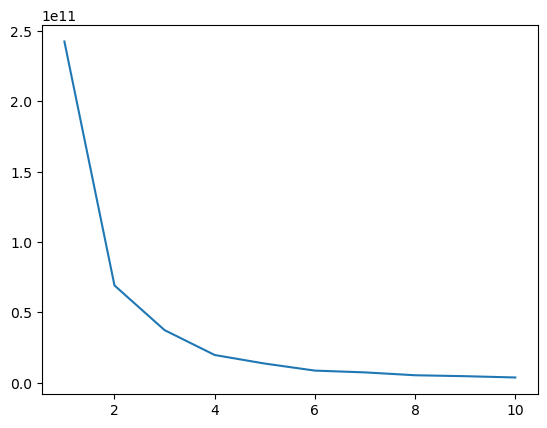

In [10]:
plt.plot(range(1,11),results)